In [1]:
#Importing Modules
from Funcoes_auxiliares.func_aux import *
import pandas as pd
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
#from google.colab import drive
from pandas.testing import assert_frame_equal
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from tabulate import tabulate
import warnings
from Funcoes_auxiliares.func_aux import *
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.metrics import classification_report, confusion_matrix
import time
warnings.filterwarnings("ignore")


C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('base_limpa/base_unificada_limpa.csv')
periodo='2019-2020'
df = df.loc[df['ano_evento'].isin([2019, 2020])]
df = df.reset_index(drop=True)
df['ANO'] = np.where(df['ano_evento']==2019, 0, 1)
# Variável PRM
df['PRM'] = np.where(df['idade_gestacao_faixa'].isin(['entre_37_39', 'entre_40_42']), 0, 1)


In [3]:
df['cat_peso_calc'] = [
    func_peso_calculado(sexo, peso, int(round(semana_gest,0))) for sexo, peso, semana_gest in zip(df['SEXO'], df['PESO'], df['SEMAGESTAC']) 
]

In [4]:
df['cat_peso_calc'].value_counts()

AIG    3848802
PIG     920924
GIG     646277
Name: cat_peso_calc, dtype: int64

In [5]:
aa = df[df['FLAG_BASE']=='SIM_DOFET']

In [6]:
pd.unique(aa['idademae_faixa'])
#idademae_faixa
#idade_gestacao_faixa

array(['entre_20_34', 'menor_igual_19', 'entre_35_39', 'maior_igual_40'],
      dtype=object)

# Modelo 2

In [7]:
variaveis_1 = [  
     'ANO'
    , 'PRM'
    , 'evento_REGIAO'
    , 'idademae_faixa'
    , 'escolaridade_mae'
    , 'tipo_gravidez'
    , 'idade_gestacao_faixa'
    , 'def_sexo'
    , 'peso_faixa'
    , 'cat_peso_calc'
    , 'FLAG_BASE'
    #, 'sum_CENTROBS'
    #, 'sum_QTINST34'
    #, 'sum_QTINST35'
    #, 'sum_QTINST36'
    #, 'sum_QTINST37'
    #, 'sum_QTLEIT34'
    #, 'sum_QTLEIT38'
    #, 'sum_QTLEIT39'
    #, 'sum_QTLEIT40'
    #, 'sum_CENTRNEO'
    #, 'TP_UNID_5'
    #, 'TP_UNID_7'
    #, 'TP_UNID_15'
    #, 'TP_UNID_36'
    #, 'TP_UNID_61'
    ]
df_mod = df[variaveis_1]

In [ ]:
# Categorizando as novas variáveis. 
# df_mod['cat_CENTROBS'] = [1 if i > 0 else 0 for i in df_mod['sum_CENTROBS']]
# df_mod['cat_QTINST34'] = [1 if i > 0 else 0 for i in df_mod['sum_QTINST34']]
# df_mod['cat_QTINST35'] = [1 if i > 0 else 0 for i in df_mod['sum_QTINST35']]
# df_mod['cat_QTINST36'] = [1 if i > 0 else 0 for i in df_mod['sum_QTINST36']]
# df_mod['cat_QTINST37'] = [1 if i > 0 else 0 for i in df_mod['sum_QTINST37']]
# df_mod['cat_QTLEIT34'] = [1 if i > 0 else 0 for i in df_mod['sum_QTLEIT34']]
# df_mod['cat_QTLEIT38'] = [1 if i > 0 else 0 for i in df_mod['sum_QTLEIT38']]
# df_mod['cat_QTLEIT39'] = [1 if i > 0 else 0 for i in df_mod['sum_QTLEIT39']]
# df_mod['cat_QTLEIT40'] = [1 if i > 0 else 0 for i in df_mod['sum_QTLEIT40']]
# df_mod['cat_CENTRNEO'] = [1 if i > 0 else 0 for i in df_mod['sum_CENTRNEO']]
# df_mod['cat_TP_UNID_5'] = [1 if i > 0 else 0 for i in df_mod['TP_UNID_5']]
# df_mod['cat_TP_UNID_7'] = [1 if i > 0 else 0 for i in df_mod['TP_UNID_7']]
# df_mod['cat_TP_UNID_15'] = [1 if i > 0 else 0 for i in df_mod['TP_UNID_15']]
# df_mod['cat_TP_UNID_36'] = [1 if i > 0 else 0 for i in df_mod['TP_UNID_36']]
# df_mod['cat_TP_UNID_61'] = [1 if i > 0 else 0 for i in df_mod['TP_UNID_61']]

In [ ]:
#df_mod = df_mod.drop(
#    columns=[
#        'sum_CENTROBS'
#        ,'sum_QTINST34'
#        ,'sum_QTINST35'
#        ,'sum_QTINST36'
#        ,'sum_QTINST37'
#        ,'sum_QTLEIT34'
#        ,'sum_QTLEIT38'
#        ,'sum_QTLEIT39'
#        ,'sum_QTLEIT40'
#        ,'sum_CENTRNEO'
#        ,'TP_UNID_5'
#        ,'TP_UNID_7'
#        ,'TP_UNID_15'
#        ,'TP_UNID_36'
#        ,'TP_UNID_61'
#    ]
#)

In [8]:
df_mod = pd.get_dummies(df_mod)

In [9]:
# OBITO contagem
NPT = (df_mod['FLAG_BASE_SIM_DOFET']==1).sum()
NT = (df_mod['FLAG_BASE_SIM_DOFET']==0).sum()

In [10]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416003 entries, 0 to 5416002
Data columns (total 34 columns):
 #   Column                             Dtype
---  ------                             -----
 0   ANO                                int32
 1   PRM                                int32
 2   evento_REGIAO_Centro-Oeste         uint8
 3   evento_REGIAO_Nordeste             uint8
 4   evento_REGIAO_Norte                uint8
 5   evento_REGIAO_Sudeste              uint8
 6   evento_REGIAO_Sul                  uint8
 7   idademae_faixa_entre_20_34         uint8
 8   idademae_faixa_entre_35_39         uint8
 9   idademae_faixa_maior_igual_40      uint8
 10  idademae_faixa_menor_igual_19      uint8
 11  escolaridade_mae_Ensino_medio      uint8
 12  escolaridade_mae_Ensino_superior   uint8
 13  escolaridade_mae_Fundamental       uint8
 14  escolaridade_mae_Sem_escolaridade  uint8
 15  tipo_gravidez_Multipla             uint8
 16  tipo_gravidez_Unica                uint8
 17  idade_ge

In [11]:
for i in df_mod.columns:
    print(i)

ANO
PRM
evento_REGIAO_Centro-Oeste
evento_REGIAO_Nordeste
evento_REGIAO_Norte
evento_REGIAO_Sudeste
evento_REGIAO_Sul
idademae_faixa_entre_20_34
idademae_faixa_entre_35_39
idademae_faixa_maior_igual_40
idademae_faixa_menor_igual_19
escolaridade_mae_Ensino_medio
escolaridade_mae_Ensino_superior
escolaridade_mae_Fundamental
escolaridade_mae_Sem_escolaridade
tipo_gravidez_Multipla
tipo_gravidez_Unica
idade_gestacao_faixa_entre_22_27
idade_gestacao_faixa_entre_28_36
idade_gestacao_faixa_entre_37_39
idade_gestacao_faixa_entre_40_42
def_sexo_Feminino
def_sexo_Masculino
peso_faixa_entre_1500_2499
peso_faixa_entre_2500_3500
peso_faixa_entre_3500_3999
peso_faixa_entre_500_1499
peso_faixa_maior_igual_4000
peso_faixa_menor_500
cat_peso_calc_AIG
cat_peso_calc_GIG
cat_peso_calc_PIG
FLAG_BASE_SIM_DOFET
FLAG_BASE_SINASC


In [13]:
# AAS Sinasc
# Separando as classes
minority_class = df_mod[df_mod['FLAG_BASE_SIM_DOFET'] == 1]
majority_class = df_mod[df_mod['FLAG_BASE_SIM_DOFET'] == 0]

# Reduzindo a classe majoritária para ser 50% maior que a minoritária
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# Concatenando as duas classes
df_mod = pd.concat([minority_class, majority_class_sampled]).reset_index(drop=True)
# Checando o balanceamento
print(df_mod['FLAG_BASE_SIM_DOFET'].value_counts())


1    53726
0    53726
Name: FLAG_BASE_SIM_DOFET, dtype: int64


In [14]:
# Modelo
#Defining covariates
var_model=[
     'evento_REGIAO_Centro-Oeste'
    , 'evento_REGIAO_Nordeste'
    , 'evento_REGIAO_Norte'
    #, 'evento_REGIAO_Sudeste'
    , 'evento_REGIAO_Sul'
    #, 'idademae_faixa_entre_20_34'
    , 'idademae_faixa_entre_35_39'
    , 'idademae_faixa_maior_igual_40'
    , 'idademae_faixa_menor_igual_19'
    , 'escolaridade_mae_Ensino_medio'
    #, 'escolaridade_mae_Ensino_superior'
    , 'escolaridade_mae_Fundamental'
    , 'escolaridade_mae_Sem_escolaridade'
    , 'tipo_gravidez_Multipla'
    #, 'tipo_gravidez_Unica'
    #, 'PRM'
    #, 'def_sexo_Feminino'
    , 'def_sexo_Masculino'
    #, 'cat_peso_calc_AIG'
    , 'cat_peso_calc_GIG'
    , 'cat_peso_calc_PIG'
    #, 'peso_faixa_entre_1500_2499'
    #, 'peso_faixa_entre_2500_3500'
    #, 'peso_faixa_entre_3500_3999'
    #, 'peso_faixa_entre_500_1499'
    #, 'peso_faixa_maior_igual_4000'
    #, 'peso_faixa_menor_500'
    #,'cat_CENTROBS'
    #, 'cat_QTINST34'
    #,'cat_QTINST35'
    #,'cat_QTINST36'
    #, 'cat_QTINST37'
    #, 'cat_QTLEIT34'
    #, 'cat_QTLEIT38'
    #, 'cat_QTLEIT39'
    #, 'cat_QTLEIT40'
    #, 'cat_CENTRNEO'
    #, 'cat_TP_UNID_5'
    #, 'cat_TP_UNID_7'
    #, 'cat_TP_UNID_15'
    #, 'cat_TP_UNID_36'
]

X = df_mod[var_model].values

## FIRST REGRESSION
y = df_mod[['ANO']].values
clf = LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
df_mod = df_mod.assign(PROPENSITY_SCORE=clf.predict_proba(X)[:, 1])

#USING PROPENSITY SCORE TO SELECT SAMPLES TO SECOND REGRESSION
psw_base=df_mod[((df_mod['PROPENSITY_SCORE']>df_mod['PROPENSITY_SCORE'].quantile(0.1)) &
                 (df_mod['PROPENSITY_SCORE']<df_mod['PROPENSITY_SCORE'].quantile(0.9)))]

#COUNTING
po=len(df_mod)
tpo=len(df_mod[df_mod['ANO']==1])
cpo=len(df_mod[df_mod['ANO']==0])
pa=len(psw_base)
tpa=len(psw_base[psw_base['ANO']==1])
cpa=len(psw_base[psw_base['ANO']==0])

print('----------------------------------------------------------------')
print('USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES')
print('----------------------------------------------------------------')
print('N without missing  :', po)
print('Treated samples    :', tpo,np.round(100*tpo/po,2),'%')
print('Controled samples  :', cpo,np.round(100*cpo/po,2),'%')
print('----------------------------------------------------------------')
print('SELECTED/MATCHET SAMPLES')
print('----------------------------------------------------------------')
print('% Selected         :', np.round(100*pa/po,2),'%')
print('N selected         :', pa)
print('Treated selected   :', tpa,np.round(100*tpa/pa,2),'%')
print('Controled selected :', cpa,np.round(100*cpa/pa,2),'%')
print('----------------------------------------------------------------')
print('')

----------------------------------------------------------------
USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES
----------------------------------------------------------------
N without missing  : 107452
Treated samples    : 52980 49.31 %
Controled samples  : 54472 50.69 %
----------------------------------------------------------------
SELECTED/MATCHET SAMPLES
----------------------------------------------------------------
% Selected         : 78.69 %
N selected         : 84552
Treated selected   : 41596 49.2 %
Controled selected : 42956 50.8 %
----------------------------------------------------------------



In [40]:
## SECOND REGRESSION
aux=['ANO']
w =psw_base['ANO']/psw_base['PROPENSITY_SCORE'] + ((1-psw_base['ANO'])/(1-psw_base['PROPENSITY_SCORE']))
var_model_2 = [
      'evento_REGIAO_Centro-Oeste'
    , 'evento_REGIAO_Nordeste'
    , 'evento_REGIAO_Norte'
    #, 'evento_REGIAO_Sudeste'
    , 'evento_REGIAO_Sul'
    #, 'idademae_faixa_entre_20_34'
    , 'idademae_faixa_entre_35_39'
    , 'idademae_faixa_maior_igual_40'
    , 'idademae_faixa_menor_igual_19'
    , 'escolaridade_mae_Ensino_medio'
    #, 'escolaridade_mae_Ensino_superior'
    , 'escolaridade_mae_Fundamental'
    , 'escolaridade_mae_Sem_escolaridade'
    , 'tipo_gravidez_Multipla'
    #, 'tipo_gravidez_Unica'
    #, 'PRM'
    #, 'def_sexo_Feminino'
    #, 'def_sexo_Masculino'
    #, 'cat_peso_calc_AIG'
    , 'cat_peso_calc_GIG'
    , 'cat_peso_calc_PIG'
    #, 'peso_faixa_entre_1500_2499'
    #, 'peso_faixa_entre_2500_3500'
    #, 'peso_faixa_entre_3500_3999'
    #, 'peso_faixa_entre_500_1499'
    #, 'peso_faixa_maior_igual_4000'
    #, 'peso_faixa_menor_500'
    #,'cat_CENTROBS'
    #, 'cat_QTINST34'
    #,'cat_QTINST35'
    #,'cat_QTINST36'
    #, 'cat_QTINST37'
    #, 'cat_QTLEIT34'
    #, 'cat_QTLEIT38'
    #, 'cat_QTLEIT39'
    #, 'cat_QTLEIT40'
    #, 'cat_CENTRNEO'
    #, 'cat_TP_UNID_5'
    #, 'cat_TP_UNID_7'
    #, 'cat_TP_UNID_15'
    #, 'cat_TP_UNID_36'
]

X = psw_base[aux+var_model_2].values
y = psw_base[['FLAG_BASE_SIM_DOFET']].values

X_ANO = sm.add_constant(X)
#clf_ano = sm.Logit(y, X_ANO,weights=w).fit(maxiter=1000, method='newton')
#aux=['Intercept','ANO']

# Ajustar o modelo com regularização L2
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model.fit(X_ANO, y, sample_weight=w)

# Coeficientes do modelo
coefficients = pd.DataFrame({
    'Variable': ['Intercept'] + aux + var_model_2,
    'Coefficient': np.hstack([model.intercept_, model.coef_.flatten()])
})

# Calcular os odds ratios e intervalos de confiança
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
coefficients['p-values'] = None  # Não disponível diretamente no scikit-learn

# Nota: Para os intervalos de confiança, você precisaria de uma abordagem diferente, pois scikit-learn não fornece isso diretamente.

print('----------------------------------------------------------------')
print('PSW REPORT', 'Seu Período')  # Substitua 'Seu Período' pelo valor real
print('----------------------------------------------------------------')
print(tabulate(coefficients, headers='keys', tablefmt='grid'))
print('----------------------------------------------------------------')

# Plote a distribuição dos pesos
plt.hist(w, bins=50)
plt.xlabel('Weights')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.show()

ValueError: All arrays must be of the same length

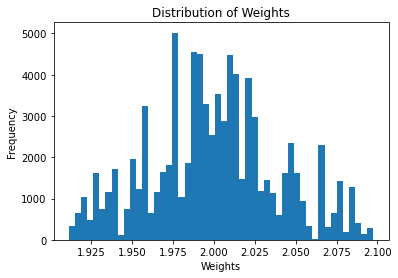

In [27]:
plt.hist(w, bins=50)
plt.xlabel('Weights')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.show()

In [23]:
psw_base['FLAG_BASE_SIM_DOFET'].value_counts()

0    45408
1    39144
Name: FLAG_BASE_SIM_DOFET, dtype: int64

In [29]:
print(w.describe())

count    84552.000000
mean         1.999791
std          0.039580
min          1.911185
25%          1.974949
50%          1.996901
75%          2.023567
max          2.097472
dtype: float64


In [ ]:
### SECOND REGRESSION
##PSW weights
##w =psw_base['ANO']/psw_base['PROPENSITY_SCORE'] + ((1-psw_base['ANO'])/(1-psw_base['PROPENSITY_SCORE']))
## PSW weights
#psw_base['weights'] =  psw_base['ANO'] / psw_base['PROPENSITY_SCORE'] + ((1-psw_base['ANO']) / (1-psw_base['PROPENSITY_SCORE']))
#aux=['ANO']
#var_model_2 = [
#      'evento_REGIAO_Centro-Oeste'
#    , 'evento_REGIAO_Nordeste'
#    , 'evento_REGIAO_Norte'
#    #, 'evento_REGIAO_Sudeste'
#    , 'evento_REGIAO_Sul'
#    #, 'idademae_faixa_entre_20_34'
#    , 'idademae_faixa_entre_35_39'
#    , 'idademae_faixa_maior_igual_40'
#    , 'idademae_faixa_menor_igual_19'
#    , 'escolaridade_mae_Ensino_medio'
#    #, 'escolaridade_mae_Ensino_superior'
#    , 'escolaridade_mae_Fundamental'
#    , 'escolaridade_mae_Sem_escolaridade'
#    , 'tipo_gravidez_Multipla'
#    #, 'tipo_gravidez_Unica'
#    #, 'PRM'
#    #, 'def_sexo_Feminino'
#    , 'def_sexo_Masculino'
#    #, 'cat_peso_calc_AIG'
#    , 'cat_peso_calc_GIG'
#    , 'cat_peso_calc_PIG'
#    #, 'peso_faixa_entre_1500_2499'
#    #, 'peso_faixa_entre_2500_3500'
#    #, 'peso_faixa_entre_3500_3999'
#    #, 'peso_faixa_entre_500_1499'
#    #, 'peso_faixa_maior_igual_4000'
#    #, 'peso_faixa_menor_500'
#    #,'cat_CENTROBS'
#    #, 'cat_QTINST34'
#    #,'cat_QTINST35'
#    #,'cat_QTINST36'
#    #, 'cat_QTINST37'
#    #, 'cat_QTLEIT34'
#    #, 'cat_QTLEIT38'
#    #, 'cat_QTLEIT39'
#    #, 'cat_QTLEIT40'
#    #, 'cat_CENTRNEO'
#    #, 'cat_TP_UNID_5'
#    #, 'cat_TP_UNID_7'
#    #, 'cat_TP_UNID_15'
#    #, 'cat_TP_UNID_36'
#]
#
## Preparando os dados
#X = psw_base[aux + var_model_2].values
#y = psw_base[['FLAG_BASE_SIM_DOFET']].values
#weights = psw_base['weights'].values
#propensity = psw_base['PROPENSITY_SCORE'].values
#
#
## Aplicando Random Undersampling
## Define a razão de amostragem: 1 (minoritária) para 1.3 (majoritária)
#sampling_strategy = 1 / 1.3  # Aproximadamente 0.769
#rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
#X_res, y_res = rus.fit_resample(X, y)
#
#start_time = time.time()
## Aplicando Tomek Links
#tl = TomekLinks()
#X_res, y_res = tl.fit_resample(X_res, y_res)
#
## Fim da medição do tempo
#end_time = time.time()
#
## Cálculo do tempo de execução
#execution_time = end_time - start_time
#
## Criando um DataFrame da base balanceada
#psw_base_balanced = pd.DataFrame(X_res, columns=aux + var_model_2)
#psw_base_balanced['FLAG_BASE_SIM_DOFET'] = y_res
#
## Encontrando os índices das observações selecionadas
#selected_indices = tl.sample_indices_
#
## Aplicando os pesos corretos às observações selecionadas
#weights_balanced = weights[selected_indices]
#propensity_balanced = propensity[selected_indices]
#
#psw_base_balanced['PROPENSITY_SCORE'] = propensity_balanced
#psw_base_balanced['weigths'] = weights_balanced
#
## Treinando o modelo final
#X_balanced = psw_base_balanced[aux + var_model_2].values
#y_balanced = psw_base_balanced[['FLAG_BASE_SIM_DOFET']].values
#weights_balanced = psw_base_balanced[['weigths']].values
#X_ANO = sm.add_constant(X_balanced)
#clf_ano = sm.Logit(y_balanced, X_ANO, weights=weights_balanced).fit(maxiter=1000)
#aux = ['Intercept', 'ANO']
#
##X_ANO = sm.add_constant(X)
##clf_ano = sm.Logit(y, X_ANO, weights=w).fit()
##aux=['Intercept','ANO']
#
#print('----------------------------------------------------------------')
#print('PSW REPORT',periodo)
#print('----------------------------------------------------------------')
#print(clf_ano.summary(xname=aux+var_model_2))
#print('----------------------------------------------------------------')
#
#
#IC=np.exp(clf_ano.conf_int(0.05))
#odds_ratio=pd.DataFrame(
#    data = {
#        'Var':aux+var_model_2
#        , 'Odds_ratio': np.round(np.exp(clf_ano.params),3)
#        , 'Odds_Lim_inf': np.round(IC[:,0],3)
#        , 'Odds_Lim_Sup': np.round(IC[:,1],3)
#        , 'p-values':np.round(clf_ano.pvalues,3)
#    }
#)
#print(tabulate(odds_ratio, headers = 'keys', tablefmt = 'grid'))

In [ ]:
with open(f'resultados/modelo_2/{periodo}_modelo_2_OBITO.txt', 'w') as f:
    f.write('---------------------------------------------------------------- \n')
    f.write('USING PROPENSITY SCORE TO SELECT/MATCH SAMPLES \n')
    f.write('----------------------------------------------------------------\n')
    f.write('N without missing  :' + str(po) +'\n')
    f.write('Treated samples    :' + str([tpo,np.round(100*tpo/po,2)]) + '% \n')
    f.write('Controled samples  :' + str([cpo,np.round(100*cpo/po,2)]) + '% \n')
    f.write('---------------------------------------------------------------- \n')
    f.write('SELECTED/MATCHET SAMPLES\n')
    f.write('---------------------------------------------------------------- \n')
    f.write('% Selected         :' + str(np.round(100*pa/po,2)) + '% \n')
    f.write('N selected         :' + str(pa) + '\n')
    f.write('Treated selected   :' + str([tpa,np.round(100*tpa/pa,2)]) + '% \n')
    f.write('Controled selected :' + str([cpa,np.round(100*cpa/pa,2)]) + '% \n')
    f.write('---------------------------------------------------------------- \n')
    f.write('PSW REPORT - ' + periodo+ '\n')
    f.write(str(clf_ano.summary(xname=aux+var_model_2)))
    f.write('\n')
    f.write(tabulate(odds_ratio, headers = 'keys', tablefmt = 'grid'))

In [ ]:
odds_ratio['periodo'] = periodo
odds_ratio.to_csv(f'resultados/modelo_2/{periodo}_modelo_2_OBITO.csv', decimal=',', sep=';', index=False)

In [ ]:
fig = sns.kdeplot(df_mod.query("ANO==0")["PROPENSITY_SCORE"],bw_adjust=.7, shade=False, color="r")
fig = sns.kdeplot(df_mod.query("ANO==1")["PROPENSITY_SCORE"],bw_adjust=.7, shade=False, color="b")
plt.legend(['Control','Treatment'])
plt.savefig(f'resultados/modelo_2/fig1a_{periodo}_modelo_2_OBITO.png', format='png', dpi=300)
plt.show()

In [ ]:
fig = sns.kdeplot(psw_base.query("ANO==0")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="r")
fig = sns.kdeplot(psw_base.query("ANO==1")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="b")
plt.legend(['Control','Treatment'])
plt.savefig(f'resultados/modelo_2/fig1b_{periodo}_modelo_2_PRM.png', format='png', dpi=300)
plt.show()

In [ ]:
#fig = sns.kdeplot(psw_base_balanced.query("ANO==0")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="r")
#fig = sns.kdeplot(psw_base_balanced.query("ANO==1")["PROPENSITY_SCORE"],bw_adjust=0.7, shade=False, color="b")
#plt.legend(['Control','Treatment'])
#plt.savefig(f'resultados/modelo_2/fig1b_{periodo}_modelo_2_OBITO.png', format='png', dpi=300)
#plt.show()

In [ ]:
#spearm
var_corr = ['PRM'] + var_model_2

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(psw_base[var_corr].corr(method="spearman"), dtype=np.bool))
heatmap = sns.heatmap(psw_base[var_corr].corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matrix', fontdict={'fontsize':18}, pad=16);